# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [8]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def resize_images(data,size):
    '''
    Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.
    '''
    resized_data = np.empty((data.shape[0],size[0]*size[1]))
    for i in range(data.shape[0]):
        d = (np.array(Image.fromarray(data[i,:].reshape((28,28))).resize(size))).flatten()
        resized_data[i,:] = d
    return resized_data    

In [10]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [11]:
# Preparing the data set
with open('AI_quick_draw.pickle', 'rb') as open_ai_quick:
    data_train = pickle.load(open_ai_quick)
    label_train1 = pickle.load(open_ai_quick)
    data_test = pickle.load(open_ai_quick)
    label_test1 = pickle.load(open_ai_quick)
    data_train1 = resize_images(data_train,(5,5))
n_classes = len(np.unique(label_train1))
# convert labels to 0-1 hot encoding
label_train = np.zeros((label_train1.shape[0], n_classes))
a = np.arange(label_train1.shape[0], dtype=np.int64)
b = np.array(label_train1, dtype=np.int64).reshape((label_train1.shape[0],))
label_train[a, b] = 1

label_test = np.zeros((label_test1.shape[0], n_classes))
c = np.arange(label_test1.shape[0], dtype=np.int64)
d = np.array(label_test1, dtype=np.int64).reshape((label_test1.shape[0],))
label_test[c, d] = 1

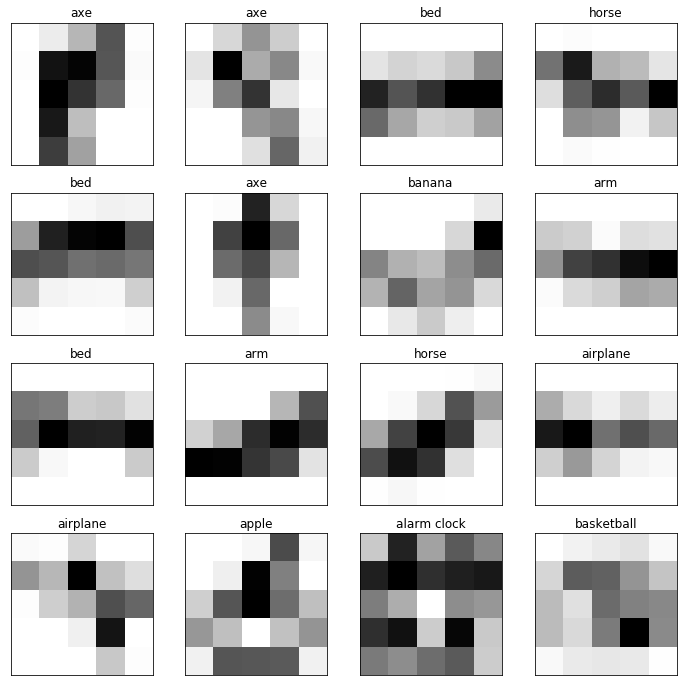

In [12]:
# visualize some images
fig = plt.figure(figsize=[12,12])
for i in range(16):
    ax = plt.subplot(4,4,i+1)    
    ind = np.random.randint(0,data_train1.shape[0])
    plt.imshow(data_train1[ind,:].reshape((5,5)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(label_train1[ind])])

In [13]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

**WARNING**: This cell will take a significantly long time to run

In [14]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train1.shape[1]))
#model.add(Dense(256, activation='relu'))
# you can add more Dense layers here
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data_train1, label_train, epochs=500, batch_size=32)

Epoch 1/500
100000/100000 [==============================] - 4s 39us/step - loss: 1.7084 - accuracy: 0.6879
Epoch 2/500
100000/100000 [==============================] - 4s 43us/step - loss: 0.8420 - accuracy: 0.7709
Epoch 3/500
100000/100000 [==============================] - 4s 45us/step - loss: 0.8212 - accuracy: 0.7814
Epoch 4/500
100000/100000 [==============================] - 4s 42us/step - loss: 0.8273 - accuracy: 0.7835
Epoch 5/500
100000/100000 [==============================] - 4s 43us/step - loss: 0.8379 - accuracy: 0.7822
Epoch 6/500
100000/100000 [==============================] - 4s 45us/step - loss: 0.8446 - accuracy: 0.7832
Epoch 7/500
100000/100000 [==============================] - 5s 47us/step - loss: 0.8551 - accuracy: 0.7795
Epoch 8/500
100000/100000 [==============================] - 4s 40us/step - loss: 0.8608 - accuracy: 0.7804
Epoch 9/500
100000/100000 [==============================] - 4s 43us/step - loss: 0.8702 - accuracy: 0.7794
Epoch 10/500
100000/100000 [

100000/100000 [==============================] - 4s 39us/step - loss: 1.0783 - accuracy: 0.7346
Epoch 77/500
100000/100000 [==============================] - 4s 38us/step - loss: 1.0777 - accuracy: 0.7354
Epoch 78/500
100000/100000 [==============================] - 4s 38us/step - loss: 1.0834 - accuracy: 0.7353
Epoch 79/500
100000/100000 [==============================] - 4s 40us/step - loss: 1.0764 - accuracy: 0.7330
Epoch 80/500
100000/100000 [==============================] - 4s 40us/step - loss: 1.0778 - accuracy: 0.7323
Epoch 81/500
100000/100000 [==============================] - 4s 41us/step - loss: 1.0883 - accuracy: 0.7326
Epoch 82/500
100000/100000 [==============================] - 5s 48us/step - loss: 1.0839 - accuracy: 0.7311
Epoch 83/500
100000/100000 [==============================] - 5s 45us/step - loss: 1.0887 - accuracy: 0.7315
Epoch 84/500
100000/100000 [==============================] - 4s 40us/step - loss: 1.0904 - accuracy: 0.7317
Epoch 85/500
100000/100000 [====

100000/100000 [==============================] - 4s 45us/step - loss: 1.1288 - accuracy: 0.7201
Epoch 151/500
100000/100000 [==============================] - 4s 42us/step - loss: 1.1302 - accuracy: 0.7208
Epoch 152/500
100000/100000 [==============================] - 4s 44us/step - loss: 1.1353 - accuracy: 0.7208
Epoch 153/500
100000/100000 [==============================] - 5s 46us/step - loss: 1.1188 - accuracy: 0.7216
Epoch 154/500
100000/100000 [==============================] - 4s 45us/step - loss: 1.1212 - accuracy: 0.7214
Epoch 155/500
100000/100000 [==============================] - 5s 47us/step - loss: 1.1246 - accuracy: 0.7223
Epoch 156/500
100000/100000 [==============================] - 5s 47us/step - loss: 1.1215 - accuracy: 0.7220
Epoch 157/500
100000/100000 [==============================] - 5s 46us/step - loss: 1.1222 - accuracy: 0.7227
Epoch 158/500
100000/100000 [==============================] - 5s 46us/step - loss: 1.1232 - accuracy: 0.7235
Epoch 159/500
100000/100

100000/100000 [==============================] - 5s 49us/step - loss: 1.1499 - accuracy: 0.7198
Epoch 225/500
100000/100000 [==============================] - 5s 54us/step - loss: 1.1495 - accuracy: 0.7201
Epoch 226/500
100000/100000 [==============================] - 4s 44us/step - loss: 1.1419 - accuracy: 0.7202
Epoch 227/500
100000/100000 [==============================] - 4s 44us/step - loss: 1.1481 - accuracy: 0.7191
Epoch 228/500
100000/100000 [==============================] - 4s 40us/step - loss: 1.1408 - accuracy: 0.7179
Epoch 229/500
100000/100000 [==============================] - 4s 39us/step - loss: 1.1479 - accuracy: 0.7178
Epoch 230/500
100000/100000 [==============================] - 4s 38us/step - loss: 1.1493 - accuracy: 0.7185
Epoch 231/500
100000/100000 [==============================] - 4s 39us/step - loss: 1.1514 - accuracy: 0.7194
Epoch 232/500
100000/100000 [==============================] - 4s 38us/step - loss: 1.1595 - accuracy: 0.7177
Epoch 233/500
100000/100

100000/100000 [==============================] - 4s 44us/step - loss: 1.1408 - accuracy: 0.7160
Epoch 299/500
100000/100000 [==============================] - 4s 43us/step - loss: 1.1332 - accuracy: 0.7169
Epoch 300/500
100000/100000 [==============================] - 5s 46us/step - loss: 1.1447 - accuracy: 0.7191
Epoch 301/500
100000/100000 [==============================] - 4s 42us/step - loss: 1.1289 - accuracy: 0.7163
Epoch 302/500
100000/100000 [==============================] - 4s 38us/step - loss: 1.1377 - accuracy: 0.7165
Epoch 303/500
100000/100000 [==============================] - 4s 41us/step - loss: 1.1255 - accuracy: 0.7172
Epoch 304/500
100000/100000 [==============================] - 4s 38us/step - loss: 1.1259 - accuracy: 0.7163
Epoch 305/500
100000/100000 [==============================] - 4s 37us/step - loss: 1.1410 - accuracy: 0.7161
Epoch 306/500
100000/100000 [==============================] - 4s 41us/step - loss: 1.1311 - accuracy: 0.7150
Epoch 307/500
100000/100

100000/100000 [==============================] - 3s 33us/step - loss: 1.1331 - accuracy: 0.7153
Epoch 373/500
100000/100000 [==============================] - 3s 33us/step - loss: 1.1242 - accuracy: 0.7148
Epoch 374/500
100000/100000 [==============================] - 3s 32us/step - loss: 1.1478 - accuracy: 0.7146
Epoch 375/500
100000/100000 [==============================] - 3s 33us/step - loss: 1.1386 - accuracy: 0.7128
Epoch 376/500
100000/100000 [==============================] - 3s 34us/step - loss: 1.1412 - accuracy: 0.7154
Epoch 377/500
100000/100000 [==============================] - 3s 34us/step - loss: 1.1497 - accuracy: 0.7148
Epoch 378/500
100000/100000 [==============================] - 4s 36us/step - loss: 1.1446 - accuracy: 0.7132
Epoch 379/500
100000/100000 [==============================] - 4s 36us/step - loss: 1.1406 - accuracy: 0.7142
Epoch 380/500
100000/100000 [==============================] - 4s 37us/step - loss: 1.1494 - accuracy: 0.7134
Epoch 381/500
100000/100

100000/100000 [==============================] - 3s 35us/step - loss: 1.1217 - accuracy: 0.7166
Epoch 447/500
100000/100000 [==============================] - 4s 35us/step - loss: 1.1232 - accuracy: 0.7159
Epoch 448/500
100000/100000 [==============================] - 4s 36us/step - loss: 1.1131 - accuracy: 0.7148
Epoch 449/500
100000/100000 [==============================] - 4s 35us/step - loss: 1.1114 - accuracy: 0.7153
Epoch 450/500
100000/100000 [==============================] - 4s 36us/step - loss: 1.1252 - accuracy: 0.7164
Epoch 451/500
100000/100000 [==============================] - 3s 34us/step - loss: 1.1250 - accuracy: 0.7156
Epoch 452/500
100000/100000 [==============================] - 3s 34us/step - loss: 1.1187 - accuracy: 0.7147
Epoch 453/500
100000/100000 [==============================] - 3s 34us/step - loss: 1.1205 - accuracy: 0.7156
Epoch 454/500
100000/100000 [==============================] - 3s 34us/step - loss: 1.1199 - accuracy: 0.7164
Epoch 455/500
100000/100

In [16]:
# save the model to use with the drawing app (this will be released later)
model.save('pa2-part2-model.h5')